In [1]:
from emojify.nn_manager import NNManager
from emojify.lstm_bert_embeddings import ExampleNet
import torch
import emojify.utils as utils
import seaborn as sns
import matplotlib.pyplot as plt
from emojify.transformer_data import load_transformer_data
%load_ext autoreload
%autoreload 2

c:\Users\ugioh\code\emojify\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:


embedding_dim = 384  # should probably be 32
hidden_dim = 32  # should probably be 32
epochs = 30
batch_size = 32
learning_rate = 5e-3
early_stop_count = 4
train, val, test = load_transformer_data(batch_size)

classes [4, 4, 0, 3, 0, 4, 5, 1, 2, 3, 4, 2, 0, 4, 2, 2, 4, 4, 4, 1, 0, 1, 2, 2, 0, 4, 4, 4, 0, 2, 2, 1, 5, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 4, 4, 2, 3, 2, 0, 2, 4, 0, 1, 2, 4, 4, 5, 2, 2, 2, 3, 1, 1, 5, 0, 0, 4, 3, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 0, 4, 0, 0, 0, 2, 2, 2, 2, 4, 1, 3, 0, 4, 0, 3, 4, 2, 2, 4, 0, 3, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 3, 4, 4, 2, 2, 4, 2, 2, 1, 1, 1, 4, 3, 2, 2, 3, 1, 5, 2, 2, 2, 2, 0, 1, 2, 0, 3, 0, 4, 2, 4, 0, 2, 5, 4, 0, 0, 4, 2, 1, 2, 2, 1, 4, 5, 5, 2, 0, 1, 0, 4, 0, 4, 1, 4, 2, 5, 1, 2, 0, 2, 0, 2, 1, 1, 4, 2, 2, 4, 5, 2, 1, 2, 4, 2, 2, 2, 1, 2, 5, 2, 0, 4, 4, 2, 0, 4, 2, 2, 5, 2, 1, 2, 1, 4, 1, 3, 4, 1, 3, 4, 4, 0, 2, 3, 0, 4, 5, 0, 2, 4, 0, 2, 2, 2, 2, 2, 4, 2, 3, 2, 4, 0, 5, 2, 0, 2, 3, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2, 1, 4, 0, 4, 0, 3, 2, 3, 4, 2, 2, 2, 4, 2, 4, 0, 3, 4, 3, 4, 4, 4, 4, 4, 4, 1, 2, 4, 4, 2, 3, 4, 0, 4, 3, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 3, 1, 4, 1, 2, 2, 1, 2, 0, 0, 3, 4, 5, 2, 0, 4, 4, 0, 3, 5, 4, 3, 2, 0, 2, 4, 4, 2, 2, 1, 4, 0, 2, 3

ExampleNet(
  (relu): ReLU()
  (lstm): LSTM(384, 32, num_layers=2, batch_first=True)
  (linear1): Linear(in_features=32, out_features=128, bias=True)
  (hidden2tag): Linear(in_features=128, out_features=6, bias=True)
)
---- Epoch 1 of 30 ----


 54%|█████▍    | 269/500 [00:01<00:01, 203.01it/s]

Epoch: 0, Batches per seconds: 199.54, Global step:    250, Validation Loss: 1.79, Validation Accuracy: 0.146


100%|██████████| 500/500 [00:02<00:00, 215.87it/s]


Epoch: 0, Batches per seconds: 215.96, Global step:    500, Validation Loss: 1.79, Validation Accuracy: 0.146
---- Epoch 2 of 30 ----


 54%|█████▍    | 272/500 [00:01<00:00, 229.98it/s]

Epoch: 1, Batches per seconds: 225.17, Global step:    750, Validation Loss: 1.79, Validation Accuracy: 0.146


100%|█████████▉| 499/500 [00:02<00:00, 248.25it/s]


Epoch: 1, Batches per seconds: 231.09, Global step:   1000, Validation Loss: 1.79, Validation Accuracy: 0.146
Early stop criteria met
Early stopping.


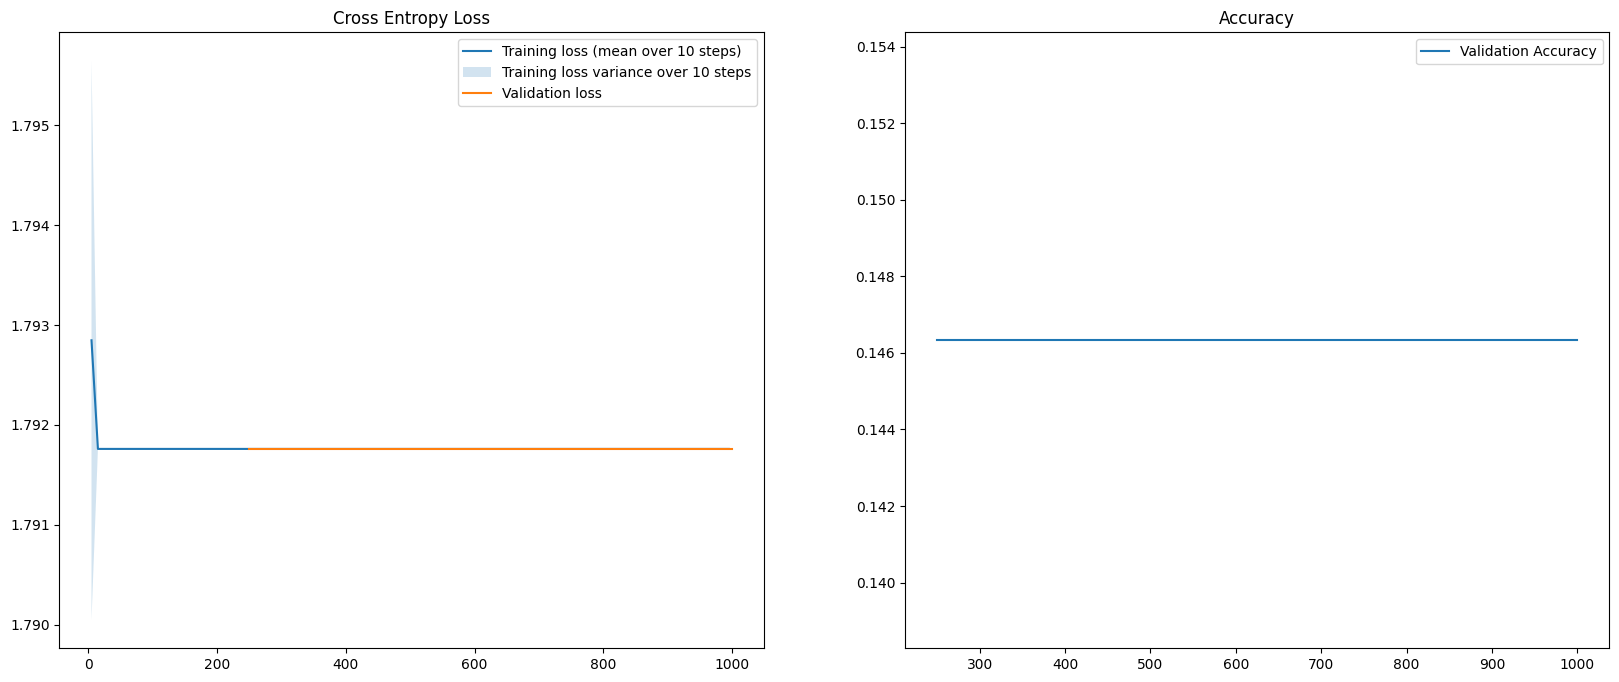

In [3]:
model = ExampleNet(embedding_dim, hidden_dim, 6)
nn_manager = NNManager(
    batch_size,
    learning_rate,
    early_stop_count,
    epochs,
    model,
    (train, val, test),
)
nn_manager.train()

In [4]:
accuracy = nn_manager.test()
accuracy

100%|██████████| 63/63 [00:00<00:00, 1216.02it/s]

Classification Report:
              precision    recall  f1-score   support

           0       0.14      1.00      0.24       272
           1       0.00      0.00      0.00       262
           2       0.00      0.00      0.00       655
           3       0.00      0.00      0.00       156
           4       0.00      0.00      0.00       568
           5       0.00      0.00      0.00        87

    accuracy                           0.14      2000
   macro avg       0.02      0.17      0.04      2000
weighted avg       0.02      0.14      0.03      2000




c:\Users\ugioh\code\emojify\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ugioh\code\emojify\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ugioh\code\emojify\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.136

In [5]:
class_to_idx = {'anger': 0, 'fear': 1, 'joy': 2, 'love': 3, 'sadness': 4, 'surprise': 5}
idx_to_class = {v: k for k, v in class_to_idx.items()}
from emojify.transformer_embeddings import get_transformer_embeddings
import emojify.utils as utils

def get_emoji(sentence):
    model.eval()
    with torch.no_grad():
        sentence = get_transformer_embeddings(sentence)
        input_ = utils.to_cuda(torch.tensor(sentence).reshape(1, -1))
        tag_scores = model(input_)
        predicted = tag_scores.argmax(dim=1)
        return idx_to_class[predicted.item()]


In [6]:
get_emoji("This is a very beautiful day")


'anger'

In [7]:
get_emoji("I hate you")

'anger'

In [8]:
get_emoji("What the hell is wrong with you")

'anger'